In [37]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.linalg as linalg
import scipy.stats as stats

## Chargement des données, suppression des variables qualitatives

In [38]:
df = pd.read_csv('../dataset/data_cleaned.csv')
colonnes_object = df.select_dtypes(include='object').columns.tolist()
df_quantitatifs = df.drop(columns=colonnes_object + ["Attrition"])

## Centrage des données

In [39]:
mean = df_quantitatifs.mean(axis=0)
df_centered = df_quantitatifs-mean
df_centered.head()

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,4.07619,-0.086395,299.514286,-8.192517,-0.912925,-1023.865306,-0.721769,28.108844,0.270068,-0.063946,...,-0.153741,-1.712245,-0.793878,-3.279592,-2.79932,-1.761224,-1.008163,-0.229252,-2.187755,0.876871
1,12.07619,0.913605,-523.485714,-1.192517,-1.912925,-1022.865306,0.278231,-4.891156,-0.729932,-0.063946,...,0.846259,1.287755,0.206122,-1.279592,0.20068,0.238776,2.991837,2.770748,-1.187755,2.876871
2,0.07619,-0.086395,570.514286,-7.192517,-0.912925,-1020.865306,1.278231,26.108844,-0.729932,-1.063946,...,-0.153741,-0.712245,-0.793878,-4.279592,0.20068,0.238776,-7.008163,-4.229252,-2.187755,-4.123129
3,-3.92381,0.913605,589.514286,-6.192517,1.087075,-1019.865306,1.278231,-9.891156,0.270068,-1.063946,...,-0.153741,0.287755,-0.793878,-3.279592,0.20068,0.238776,0.991837,2.770748,0.812245,-4.123129
4,-9.92381,-0.086395,-211.485714,-7.192517,-1.912925,-1017.865306,-1.721769,-25.891156,0.270068,-1.063946,...,-0.153741,1.287755,0.206122,-5.279592,0.20068,0.238776,-5.008163,-2.229252,-0.187755,-2.123129


In [40]:
cls = PCA(n_components=5)
pcs = cls.fit_transform(df_centered)
cls.components_

array([[ 5.31766735e-05, -6.57075934e-07, -1.81543064e-03,
         3.07158089e-05, -3.37706971e-06,  1.04193586e-03,
         5.73793100e-06, -4.48275171e-05, -1.67053282e-06,
         1.01290834e-05,  6.85559841e-08,  4.08313789e-02,
         9.99163854e-01,  7.55263696e-06,  1.36453714e-06,
        -3.68016945e-06, -5.19997843e-07, -5.14477970e-07,
        -4.08390029e-06,  5.16476770e-05,  1.59326563e-07,
         8.71624279e-07, -8.37848070e-06, -1.51553856e-06,
         4.92333701e-06, -1.37329224e-05],
       [ 9.63953138e-04, -1.46288329e-06,  8.39357182e-04,
        -3.22781287e-05,  2.10332199e-05, -2.03249348e-03,
        -1.99588341e-06, -6.42381041e-05, -2.15777732e-06,
         2.23154351e-04, -1.68467447e-06,  9.99162140e-01,
        -4.08277778e-02,  7.88625524e-05,  4.57360358e-07,
        -2.09131657e-05, -1.26689862e-06,  6.01213850e-06,
         1.36189643e-06,  1.27633343e-03, -5.98676429e-06,
         4.53559260e-06,  6.72029850e-04,  2.80966276e-04,
         2.36

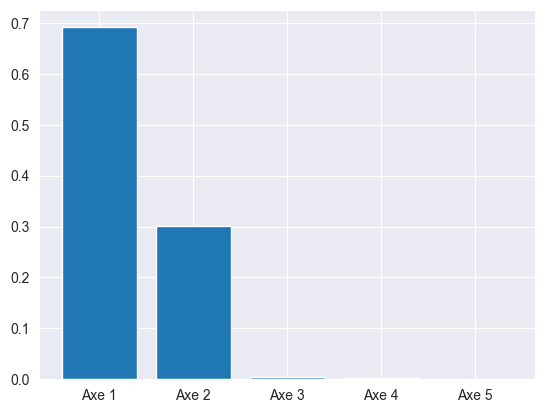

In [41]:
plt.bar(["Axe 1", "Axe 2", "Axe 3", "Axe 4", "Axe 5"], cls.explained_variance_ratio_)
plt.show()

## Deux premiers axes factoriels de l'ACP

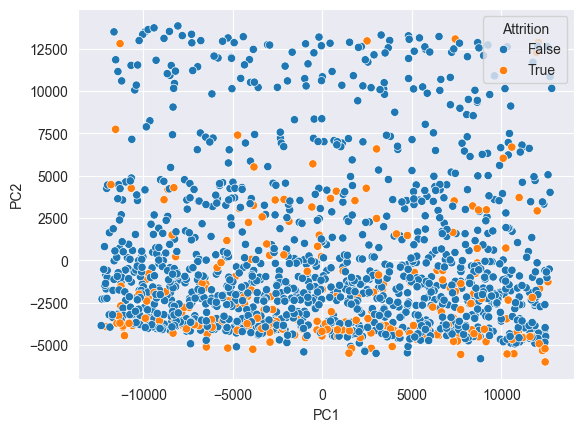

In [43]:
df_attrition = pd.DataFrame(pcs, columns=[f"PC{i}" for i in range(1, 6)])
sns.scatterplot(x="PC1", y="PC2", hue=df.Attrition, data=df_attrition)
plt.show()